In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# import and read csv file 
df = pd.read_csv(r'C:/Users/Shakil/Downloads/Compressed/Almond.csv')
df.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [32]:
df = df.drop('Unnamed: 0', axis=1) # drop unnecessary column
df = df.fillna(0, axis=1) # fill NaN values

In [33]:
x = df.drop('Type', axis=1) # feature
y = df['Type'] # target

In [34]:
# split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,
                                               random_state=42)

<IPython.core.display.Javascript object>

In [35]:
# normalize the features using StandardScaler
scaler = StandardScaler()
xtrain_scale = scaler.fit_transform(xtrain)
xtest_scale = scaler.transform(xtest)

In [36]:
# train RandomForest model
classifier = RandomForestClassifier(n_estimators=100,
                                   random_state=42)
classifier.fit(xtrain_scale, ytrain)
ypred = classifier.predict(xtest_scale)

<IPython.core.display.Javascript object>

In [37]:
# Confusion Matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[253  22  12]
 [ 11 228  39]
 [ 12  31 233]]


In [38]:
# Classification Report
class_report = classification_report(ytest, ypred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

       MAMRA       0.92      0.88      0.90       287
     REGULAR       0.81      0.82      0.82       278
      SANORA       0.82      0.84      0.83       276

    accuracy                           0.85       841
   macro avg       0.85      0.85      0.85       841
weighted avg       0.85      0.85      0.85       841



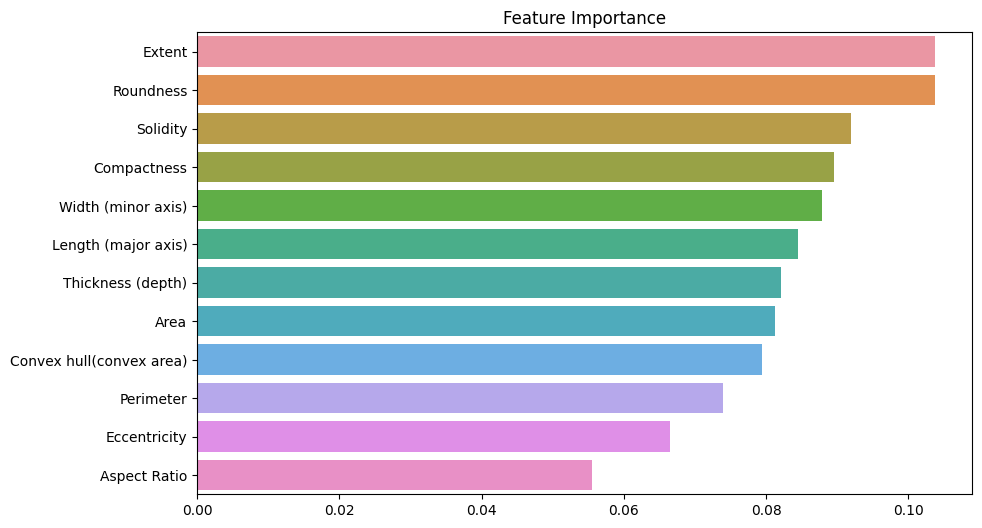

In [39]:
# Feature Importance
importances = classifier.feature_importances_
indices = pd.Series(importances, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=indices, y=indices.index)
plt.title('Feature Importance')
plt.show()